In [87]:
from sklearn import tree  #树的模块
from sklearn.datasets import load_wine, load_boston  #导入红酒数据集
from sklearn.model_selection import train_test_split  # 划分数据集的模块
from sklearn.model_selection import cross_val_score
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import numpy as np

In [88]:
# 探索数据
wine = load_wine()
# 数据有178个样本，13个特征
print(wine.data.shape)
# 标签
wine.target

(178, 13)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [89]:
#如果wine是一张表，应该长这样：

pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [90]:
# 划分数据为训练集和测试集，test_size标示测试集数据占的百分比

Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)
print(Xtrain.shape)
print(Xtest.shape)

(124, 13)
(54, 13)


In [91]:
# 建立模型


# criterion
# //这个参数正是用来决定不纯度的计算方法的。sklearn提供了两种选择
# 1）输入”entropy“，使用信息熵（Entropy）
# 2）输入”gini“，使用基尼系数（Gini Impurity）

clf = tree.DecisionTreeClassifier(criterion="entropy")  # 实例化模型，添加criterion参数
clf = clf.fit(Xtrain, Ytrain)  # 使用实例化好的模型进行拟合操作
score = clf.score(Xtest, Ytest)  #返回预测的准确度
score

# 在这里，我们发现每一次运行程序时，返回的准确率都不相同，这是因为sklearn每次都在全部的特征中选取若干个特征建立一棵树
# 最后选择准确率最高的决策树返回，如果我们添加上random_state参数，那么sklearn每一次建立决策树使用的特征都相同，返回的
# 预测分数也会一样

0.9444444444444444

In [92]:
# 对数据进行可视化
feature_name = ['酒精', '苹果酸', '灰', '灰的碱性', '镁', '总酚', '类黄酮', '非黄烷类酚类', '花青素', '颜色强度', '色调', 'od280/od315稀释葡萄酒', '脯氨酸']

In [93]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_name, class_names=["琴酒", "雪莉", "贝尔摩德"],
                                filled=True, rounded=True)

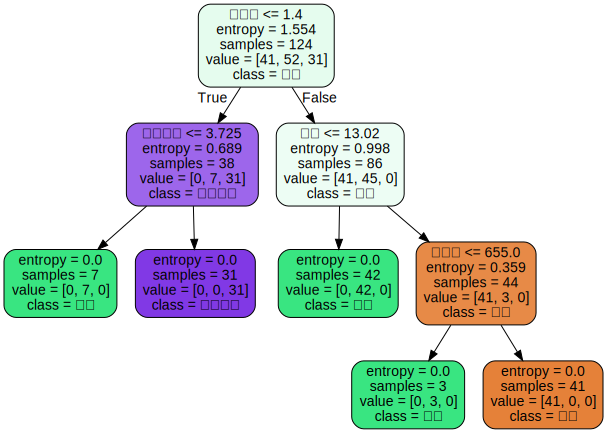

In [94]:
graph = graphviz.Source(dot_data)
graph

In [95]:
# random_state & splitter 剪枝
# random_state用来设置分枝中的随机模式的参数，默认None，在高维度时随机性会表现更明显，低维度的数据（比如鸢尾花数据集），随机性几乎不会显现。输入任意整数，会一直长出同一棵树，让模型稳定下来。也就是每次选取的特征都是一样的。
# splitter也是用来控制决策树中的随机选项的，有两种输入值，输入”best"，决策树在分枝时虽然随机，但是还是会优先选择更重要的特征进行分枝（重要性可以通过属性feature_importances_查看），输入“random"，决策树在分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。这也是防止过拟合的一种方式。当你预测到你的模型会过拟合，用这两个参数来帮助你降低树建成之后过拟合的可能性。当然，树一旦建成，我们依然是使用剪枝参数来防止过拟合。

# 保证模型稳定，每一次运行，所选取的特征不变,splitter="random"
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=30)

clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)

In [96]:
# 在不加限制的情况下，一棵决策树会生长到衡量不纯度的指标最优，或者没有更多的特征可用为止。这样的决策树往往会过拟合，这就是说，它会在训练集上表现很好，在测试集上却表现糟糕。我们收集的样本数据不可能和整体的状况完全一致，因此当一棵决策树对训练数据有了过于优秀的解释性，它找出的规则必然包含了训练样本中的噪声，并使它对未知数据的拟合程度足。
score_train = clf.score(Xtrain, Ytrain)
# 对于训练数据集的预测分数为100%，也就是过拟合了，需要我们做剪枝处理
score_train  # 1

1.0

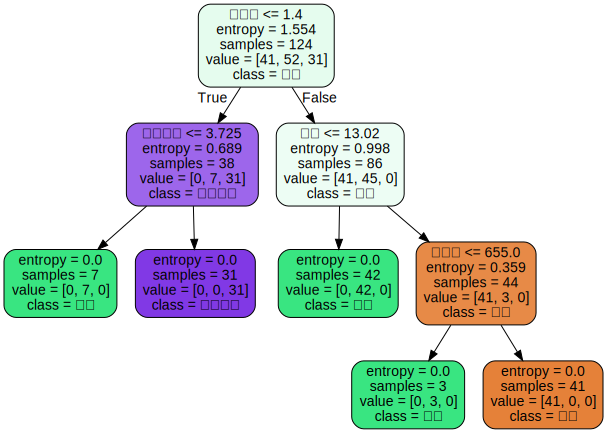

In [97]:
# 限制树的最大深度，超过设定深度的树枝全部剪掉，这是用得最广泛的剪枝参数，在高维度低样本量时非常有效。决策树多生长一层，对样本量的需求会增加一倍，所以限制树深度能够有效地限制过拟合。在集成算法中也非常实用。实际使用时，建议从=3开始尝试，看看拟合的效果再决定是否增加设定深度。
# min_samples_leaf限定，一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生，或者，分枝会朝着满足每个子节点都包含min_samples_leaf个样本的方向去发生。一般搭配max_depth使用，在回归树中有神奇的效果，可以让模型变得更加平滑。这个参数的数量设置得太小会引起过拟合，设置得太大就会阻止模型学习数据。一般来说，建议从=5开始使用。如果叶节点中含有的样本量变化很大，建议输入浮点数作为样本量的百分比来使用。同时，这个参数可以保证每个叶子的最小尺寸，可以在回归问题中避免低方差，过拟合的叶子节点出现。对于类别不多的分类问题，=1通常就是最佳选择。
# min_samples_split限定，一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发生。

clf1 = tree.DecisionTreeClassifier(criterion="entropy", random_state=30, splitter="random", max_depth=3,
                                   min_samples_leaf=10, min_samples_split=10)
clf1 = clf1.fit(Xtrain, Ytrain)  #拟合模型
dot_data = tree.export_graphviz(clf, feature_names=feature_name, class_names=["琴酒", "雪莉", "贝尔摩德"], filled=True,
                                rounded=True)
graph =graphviz.Source(dot_data)
graph

# 一般max_depth使用，用作树的”精修“。max_features限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃。和max_depth异曲同工，max_features是用来限制高维度数据的过拟合的剪枝参数，但其方法比较暴力，是直接限制可以使用的特征数量而强行使决策树停下的参数，在不知道决策树中的各个特征的重要性的情况下，强行设定这个参数可能会导致模型学习不足。如果希望通过降维的方式防止过拟合，建议使用PCA，ICA或者特征选择模块中的降维算法。
# min_impurity_decrease限制信息增益的大小，信息增益小于设定数值的分枝不会发生。这是在0.19版本中更新的功能，在0.19版本之前时使用min_impurity_split。


[0.5185185185185185, 0.8333333333333334, 0.9629629629629629, 0.9814814814814815, 0.8888888888888888, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629]


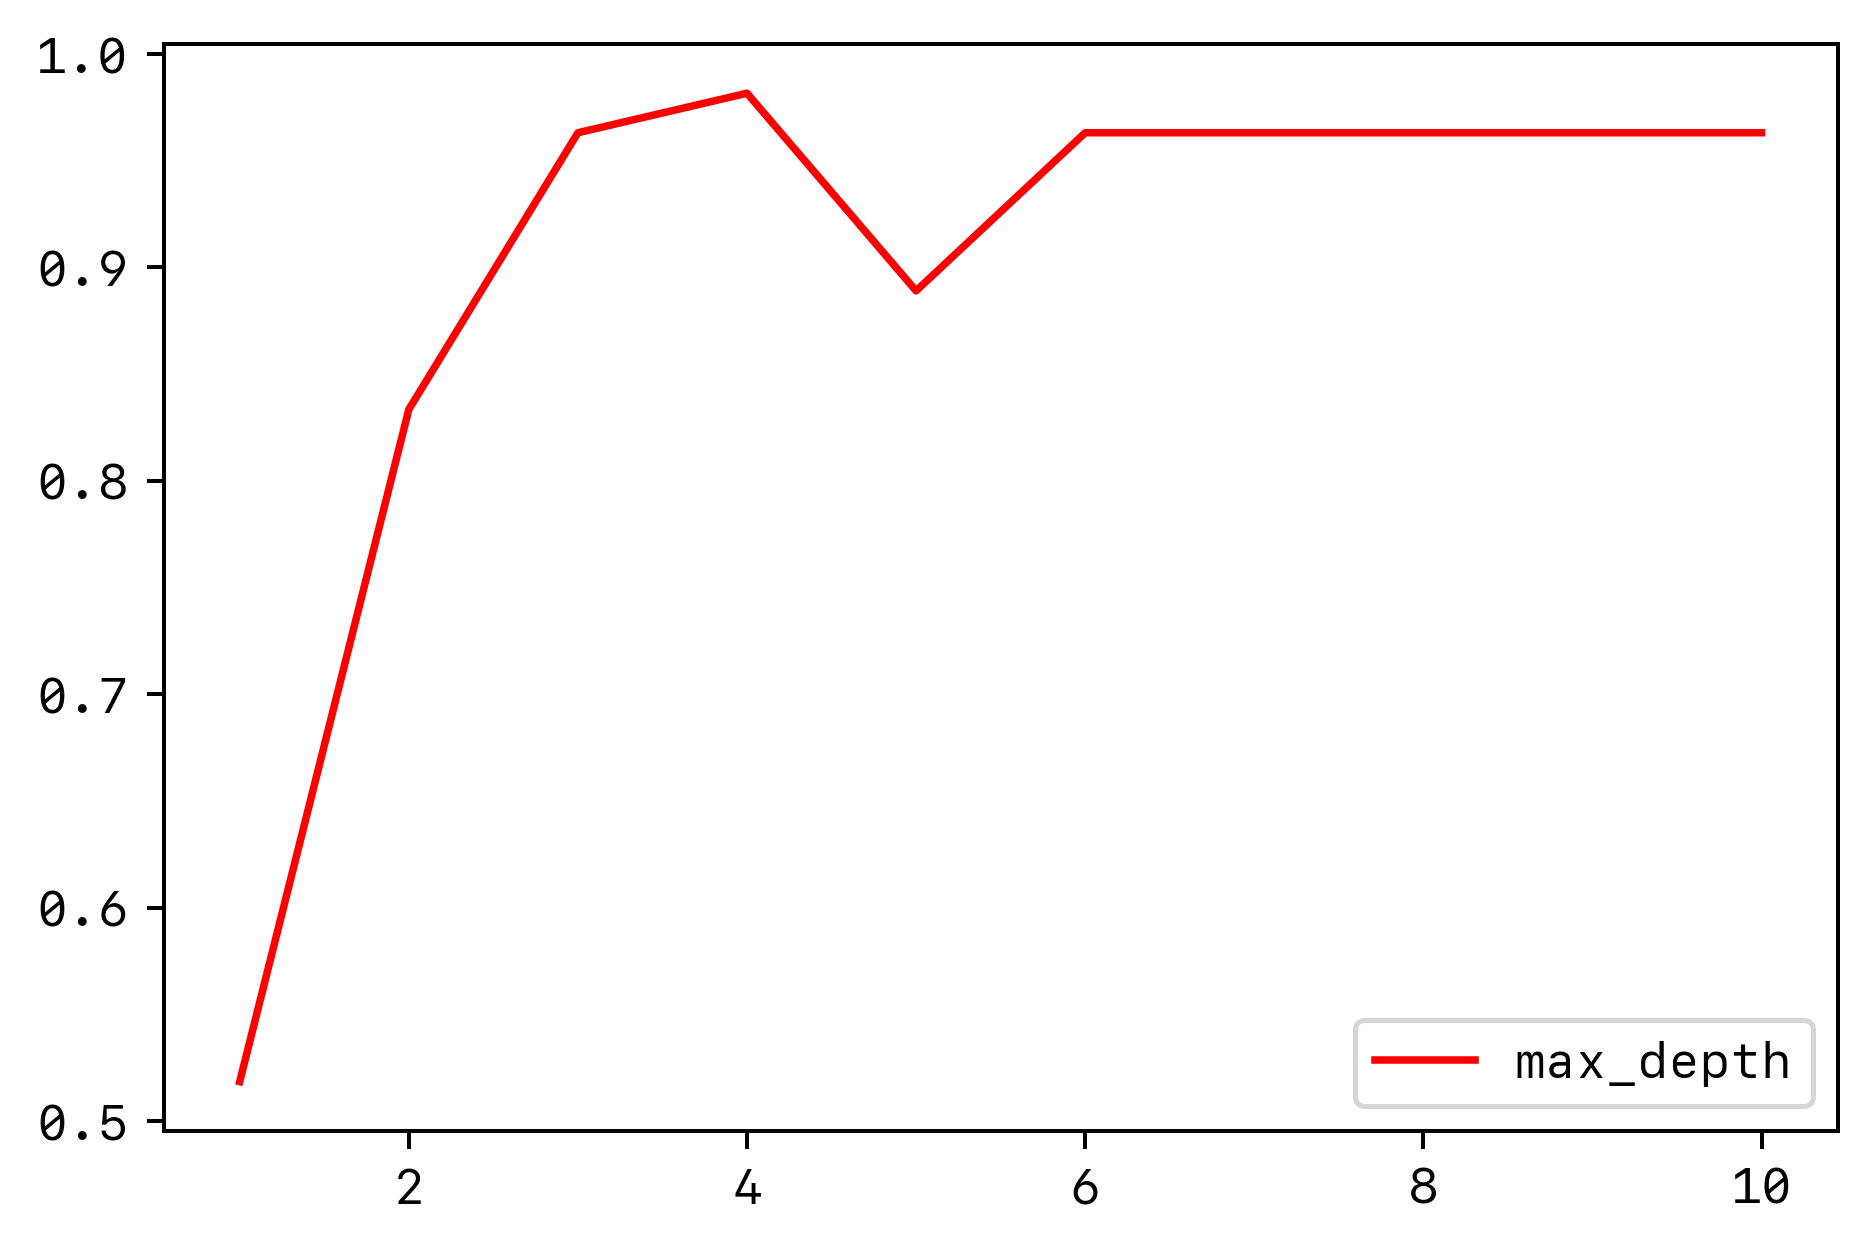

In [98]:
plt.rcParams['font.sans-serif'] = ['SF Mono']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 360  #图片像素
plt.rcParams['figure.dpi'] = 360  #分辨率

# 确定最优的剪枝参数 学习曲线
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1,criterion="entropy",random_state=30,splitter="random")
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
print(test)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [99]:
#apply返回每个测试样本所在的叶子节点的索引
print(clf.apply(Xtest))
#predict返回每个测试样本的分类/回归结果
print(clf.predict(Xtest))

# 所有接口中要求输入X_train和X_test的部分，输入的特征矩阵必须至少是一个二维矩阵。sklearn不接受任何一维矩阵作为特征矩阵被输入。如果你的数据的确只有一个特征，那必须用reshape(-1,1)来给矩阵增维；如果你的数据只有一个特征和一个样本，使用reshape(1,-1)来给你的数据增维。

[19 30 28  8  8 24 28 30 21  8  8 19 21 18  8 30  8  8 26 30 28 30 21  8
  8 28  8 21 30 19 30 13 30 21 28  8  8  8 10 21 28 30 30 28  8 10 28 19
 10  8 13 19 19 28]
[1 0 0 2 2 1 0 0 1 2 2 1 1 1 2 0 2 2 1 0 0 0 1 2 2 0 2 1 0 1 0 1 0 1 0 2 2
 2 2 1 0 0 0 0 2 2 0 1 2 2 1 1 1 0]


In [100]:
# 回归树几乎所有参数，属性及接口都和分类树一模一样。需要注意的是，在回归树种，没有标签分布是否均衡的问题，因此没有class_weight这样的参数。
boston = load_boston()
regressor = tree.DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10,scoring = "neg_mean_squared_error")
#交叉验证cross_val_score的用法

array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

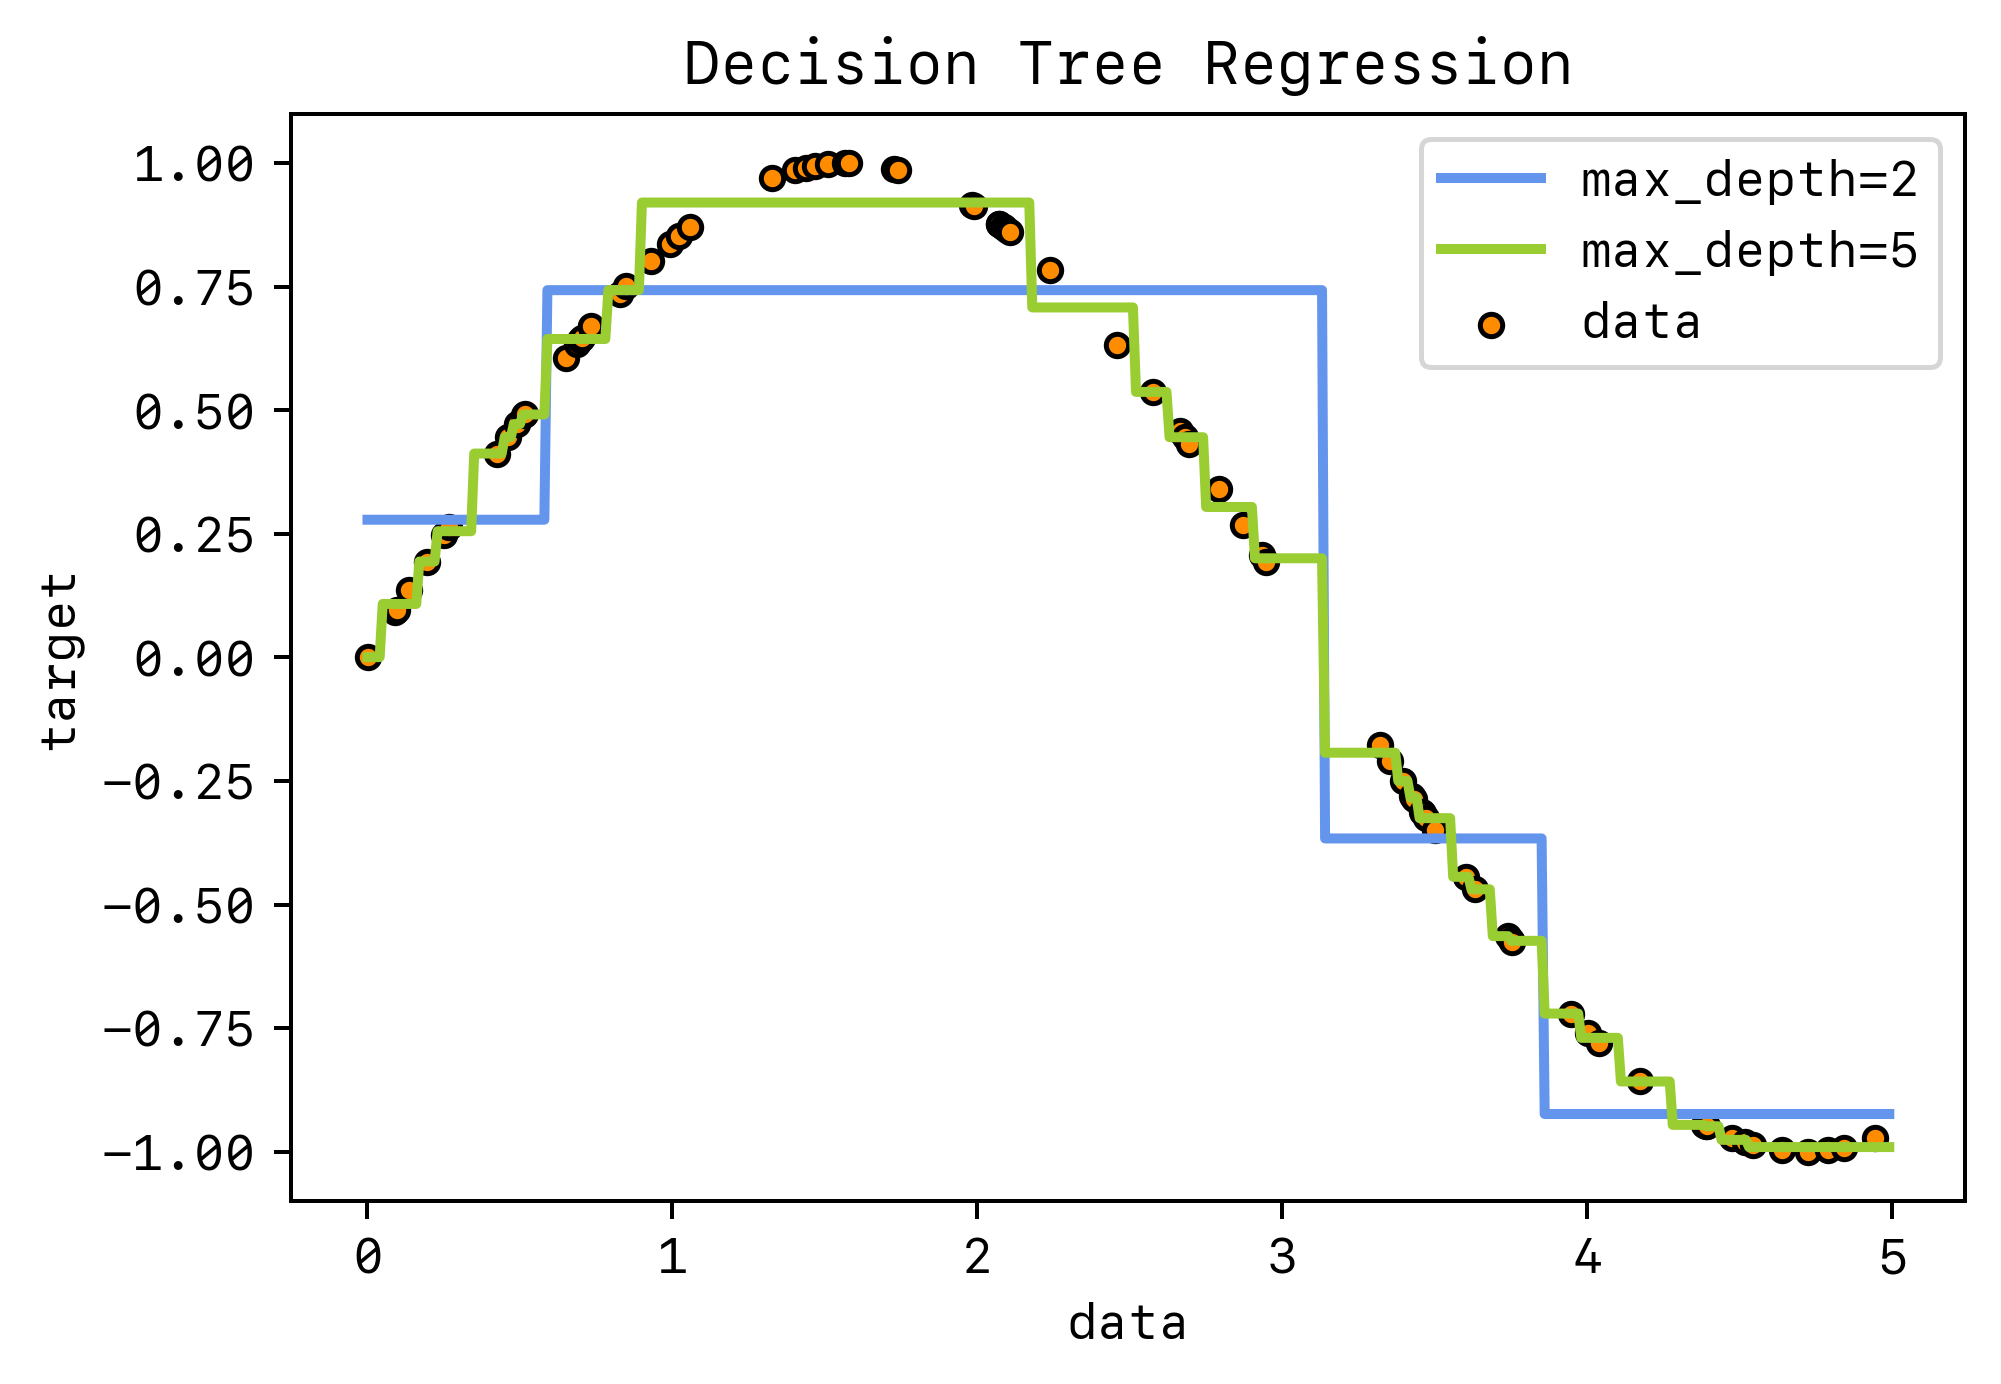

In [101]:
# 接下来我们到二维平面上来观察决策树是怎样拟合一条曲线的。我们用回归树来拟合正弦曲线，并添加一些噪声来观察回归树的表现。
#设置随机数种子，然后产生一个80*1的二维随机数数组，添加噪音
rng = np.random.RandomState(1)# 设置随机数的种子
X= np.sort(5*rng.rand(80,1),axis=0)
y = np.sin(X).ravel()# ravel()函数是降维函数
# 建立模型，并且进行拟合，建立回归树的深度不同
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)
# 产生一个序列，并且进行升维工作，np.newaxis是升维函数，然后进行预测
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()
